Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import cufflinks as cf
import numpy as np
import plotly
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Patient Id,Level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,P1,High
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,P2,Low
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,P3,Low
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,P4,High
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,P5,High


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Patient Id,Level
381,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0,P278,Low
382,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0,P279,Low
383,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0,P280,Low
384,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0,P281,Low
385,25,0,1,245,222,1,1,247,0,2.5,0,1,3,1,P282,High


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(386, 16)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         386 non-null    int64  
 1   sex         386 non-null    int64  
 2   cp          386 non-null    int64  
 3   trestbps    386 non-null    int64  
 4   chol        386 non-null    int64  
 5   fbs         386 non-null    int64  
 6   restecg     386 non-null    int64  
 7   thalach     386 non-null    int64  
 8   exang       386 non-null    int64  
 9   oldpeak     386 non-null    float64
 10  slope       386 non-null    int64  
 11  ca          386 non-null    int64  
 12  thal        386 non-null    int64  
 13  target      386 non-null    int64  
 14  Patient Id  386 non-null    object 
 15  Level       386 non-null    object 
dtypes: float64(1), int64(13), object(2)
memory usage: 48.4+ KB


In [7]:
heart_data.drop(['Patient Id'],axis = 1,inplace=True)

In [8]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,High
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Low
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Low
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,High
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,High


In [9]:
heart_data['Level']

0      High
1       Low
2       Low
3      High
4      High
       ... 
381     Low
382     Low
383     Low
384     Low
385    High
Name: Level, Length: 386, dtype: object

In [10]:
heart_data['Level'].replace('Medium','High',inplace=True)

In [11]:
heart_data['Level'].replace('High','1',inplace=True)
heart_data['Level'].replace('Low','0',inplace=True)


In [12]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [13]:
heart_data['Level'] = pd.to_numeric(heart_data['Level'])

In [14]:
heart_data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Level
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
382,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
383,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
heart_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
Level       False
dtype: bool

In [16]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
Level       0
dtype: int64

In [17]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Level
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,54.699482,0.696891,0.865285,132.764249,241.777202,0.165803,0.567358,147.222798,0.360104,1.152591,1.352332,0.777202,2.300518,0.430052,0.341969
std,8.851904,0.460198,1.020561,17.856393,52.615163,0.372386,0.536338,23.477585,0.480653,1.221924,0.611753,0.991967,0.678309,0.495726,0.474985
min,25.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,204.250000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,130.000000,235.500000,0.000000,1.000000,149.000000,0.000000,0.850000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,270.750000,0.000000,1.000000,163.000000,1.000000,1.875000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,245.000000,564.000000,1.000000,2.000000,247.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [18]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
0    220
1    166
Name: count, dtype: int64

<Axes: >

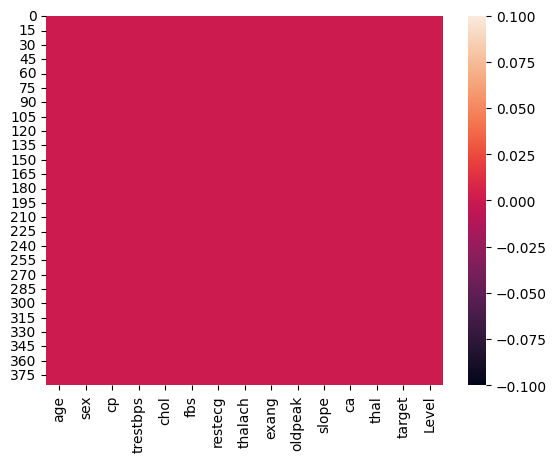

In [19]:
import seaborn as sns
sns.heatmap(heart_data.isnull())

<Axes: xlabel='trestbps', ylabel='count'>

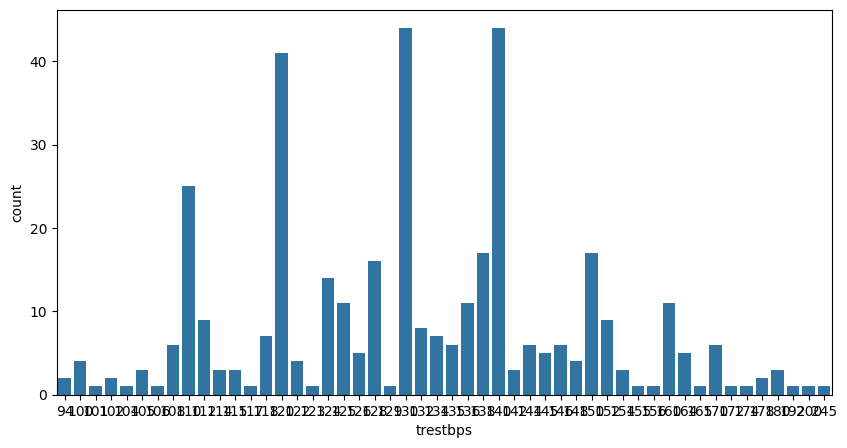

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='trestbps',data=heart_data)

<Axes: xlabel='fbs', ylabel='count'>

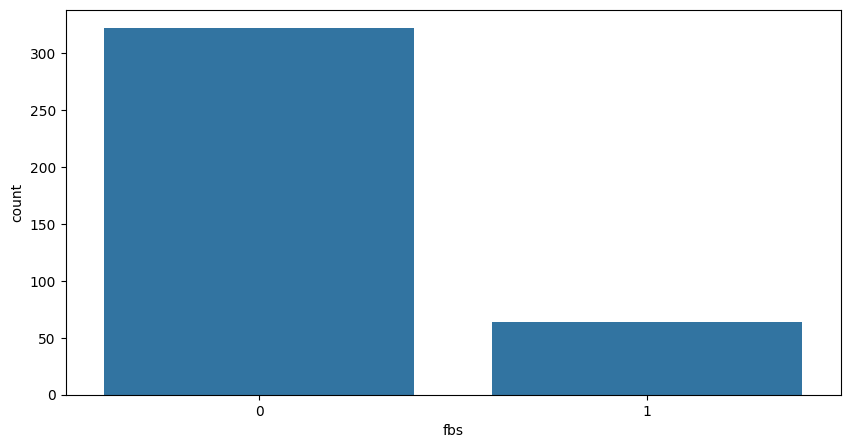

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='fbs',data = heart_data)

<Axes: xlabel='thalach', ylabel='age'>

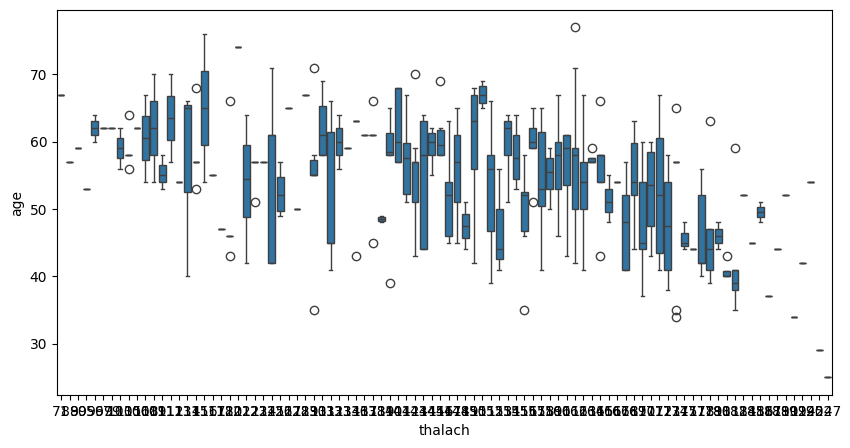

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='thalach',y='age',data = heart_data)

In [23]:
sorted_thalach = heart_data.groupby('age')['thalach'].count().to_frame()

In [24]:
sorted_thalach.style.background_gradient(cmap = 'Reds')

,thalach
age,
25,1
29,1
34,2
35,4
37,2
38,3
39,4
40,5
41,10


In [25]:
heart_data.style.background_gradient(cmap = 'Reds')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Level
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1,1


In [26]:
label = heart_data.age.sort_values().unique()       
target = sorted_thalach.thalach

In [27]:
print(label)
print(target)

[25 29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
age
25     1
29     1
34     2
35     4
37     2
38     3
39     4
40     5
41    10
42    12
43     8
44    15
45    12
46     9
47     5
48     7
49     5
50     7
51    12
52    15
53     8
54    16
55    10
56    11
57    37
58    31
59    22
60    11
61    16
62    11
63    17
64    10
65     8
66     7
67    11
68     8
69     3
70     4
71     3
74     1
76     1
77     1
Name: thalach, dtype: int64


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [28]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [29]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
381   57    1   1       124   261    0        1      141      0      0.3   
382   58    0   1       136   319    1        0      152      0      0.0   
383   61    1   0       138   166    0        0      125      1      3.6   
384   42    1   0       136   315    0        1      125      1      1.8   
385   25    0   1       245   222    1        1      247      0      2.5   

     slope  ca  thal  Level  
0        0   0     1      1  
1        0   0     2      0

In [30]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
381    0
382    0
383    0
384    0
385    1
Name: target, Length: 386, dtype: int64


Splitting the Data into Training data & Test Data

In [31]:
import pandas as pd
print(Y.isna().sum())


0


In [32]:
# Impute NaN values with mean
Y.fillna(Y.mean(), inplace=True)

# Or, remove rows with NaN values
Y.dropna(inplace=True)


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(386, 14) (308, 14) (78, 14)


Model Training

Logistic Regression

In [35]:
model = LogisticRegression()

In [36]:
X_encoded = pd.get_dummies(X)

In [37]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\taffa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Model Evaluation

Accuracy Score

In [38]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [39]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8376623376623377


In [40]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8974358974358975


In [42]:
import plotly.graph_objects as go

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=label,y=target,mode='markers+lines'))
fig.update_layout(title = 'Hearth Diseases',xaxis=dict(title='Age'),yaxis=dict(title=' trestbps'))
fig.show()

## RandomForest Classification

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np 
acc_dict = {}
# create the data
X = heart_data.drop('Level',axis = 1)
y = heart_data['Level']
X_train, X_test, y_train, y_test = train_test_split(X,y)

Accuracy score :  70.10309278350515


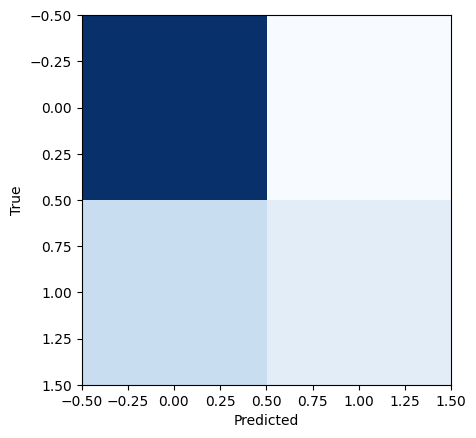

In [45]:
from sklearn.ensemble import  RandomForestClassifier
# create model
model = RandomForestClassifier()

# fit the data in the model
model.fit(X_train,y_train)

y_pred_randomF = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF)*100)

acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF,average='weighted')
# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## KNeighbourClassification

Best k is 1 with score 0.6886872353297036
Accuracy score :  70.10309278350515


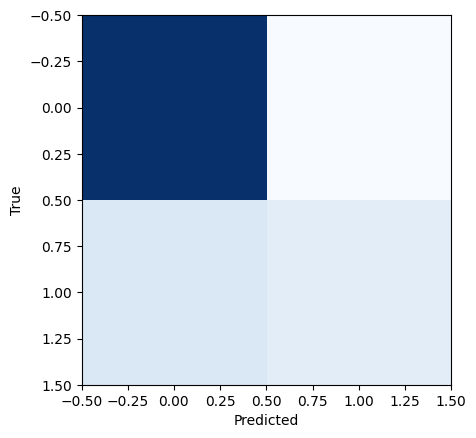

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# to find the best k 
score = 0
scores, highscore, bestk = 0, 0, 0

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train)
    score = scores.mean()
    if score>highscore:
        highscore = score
        bestk = k
print('Best k is {} with score {}'.format(bestk, highscore))

knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train,y_train)
# prediction 
y_predict = knn.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test,y_predict)*100)
acc_dict['KNN_log_loss'] = log_loss(y_test, y_predict)
acc_dict['KNN_F!1_Score'] = f1_score(y_test, y_predict,average='weighted')

# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_predict)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## KMean Clustering

Accuracy score :  13.402061855670103


C:\Users\taffa\AppData\Local\Temp\ipykernel_86512\2715091797.py:9: RuntimeWarning:

divide by zero encountered in log



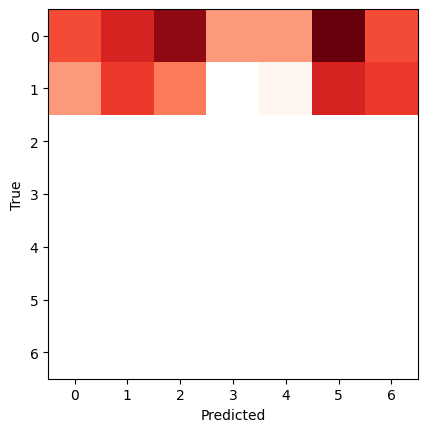

In [47]:
from sklearn.cluster import KMeans
clf = KMeans()
clf.fit(X_train)
maxx = clf.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test,maxx)*100)
acc_dict['kMeans_log_loss'] = log_loss(y_test, maxx)
acc_dict['kMeans_F1_Score'] = f1_score(y_test, maxx,average='weighted')

plt.imshow(np.log(confusion_matrix(y_test,maxx)),cmap='Reds', interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')

plt.show()

## Support Vector Classifier

Accuracy score :  68.04123711340206


C:\Users\taffa\AppData\Local\Temp\ipykernel_86512\4278561424.py:9: RuntimeWarning:

divide by zero encountered in log



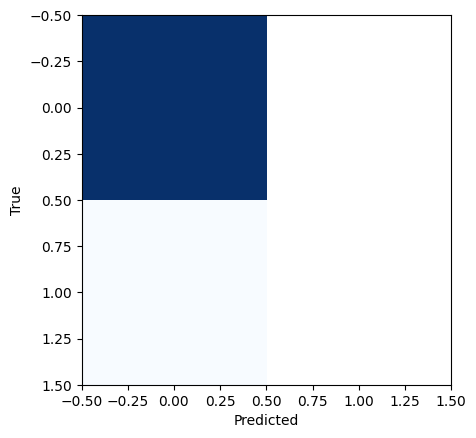

In [48]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
acc_dict['svc_log_loss'] = log_loss(y_test,y_pred)
acc_dict['svc_f!1_score'] = f1_score(y_test,y_pred)
# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [49]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (289, 14)
y_train shape: (289,)


In [50]:
print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in y_train:", y_train.isnull().sum())


Missing values in X_train: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Missing values in y_train: 0


## DecisionTreeClassifier

Accuracy score :  67.0103092783505


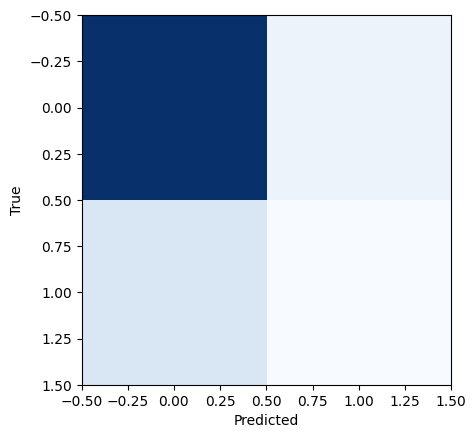

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree_ = DecisionTreeClassifier()
tree_.fit(X_train,y_train)
y_pred = tree_.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
acc_dict['Tree_log_loss'] = log_loss(y_test,y_pred)
acc_dict['Tree_f!1_score'] = f1_score(y_test,y_pred)


# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [52]:
# number of rows and Columns in this dataset
heart_data.shape

(386, 15)

In [53]:
# getting the statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Level
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,54.699482,0.696891,0.865285,132.764249,241.777202,0.165803,0.567358,147.222798,0.360104,1.152591,1.352332,0.777202,2.300518,0.430052,0.341969
std,8.851904,0.460198,1.020561,17.856393,52.615163,0.372386,0.536338,23.477585,0.480653,1.221924,0.611753,0.991967,0.678309,0.495726,0.474985
min,25.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,204.250000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,130.000000,235.500000,0.000000,1.000000,149.000000,0.000000,0.850000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,270.750000,0.000000,1.000000,163.000000,1.000000,1.875000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,245.000000,564.000000,1.000000,2.000000,247.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [54]:
# heart_data['Outcome'].value_counts()

In [55]:
import numpy as np

input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
input_data_with_placeholder = input_data + (0,)
input_data_as_numpy_array = np.asarray(input_data_with_placeholder)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


[0]
The Person does not have a Heart Disease


C:\Users\taffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



Building a Predictive System

In [56]:
# input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# # change the input data to a numpy array
# input_data_as_numpy_array= np.asarray(input_data)

# # reshape the numpy array as we are predicting for only on instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = model.predict(input_data_reshaped)
# print(prediction)

# if (prediction[0]== 0):
#   print('The Person does not have a Heart Disease')
# else:
#   print('The Person has Heart Disease')

Saving the trained model

In [57]:
import pickle

In [58]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [59]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [60]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


# Accuracy Report

|   Algorithm                 | Accuracy score |      
|-----------------------------|-------------------|
|    RFC                      |      85.22        |       
|    KNN                      |      76.43        |            
|    SVC                      |      71.43        | 
|    DecisionTreeClassifier   |      70.00        |      
